In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [34]:
loan_data = pd.read_csv("loan_approval_dataset.csv")

In [35]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [37]:
# Check for missing values
print(loan_data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [38]:
loan_data.columns = loan_data.columns.str.replace(' ','')

In [39]:
# Count of unique values
print(loan_data.nunique())

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64


In [40]:
# Display basic statistics
print(loan_data.describe())

           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06       

<ipython-input-41-3ba69e8e0e1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=loan_data, palette="coolwarm")


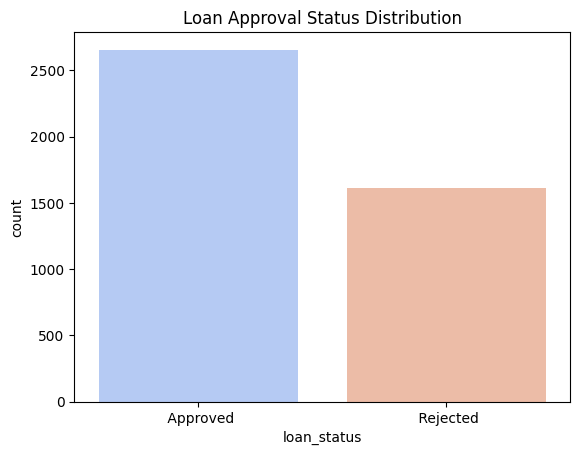

In [41]:
# Visualizing loan approval status
sns.countplot(x="loan_status", data=loan_data, palette="coolwarm")
plt.title("Loan Approval Status Distribution")
plt.show()

In [42]:
# Encode categorical variables
label_enc = LabelEncoder()
loan_data["education"] = label_enc.fit_transform(loan_data["education"])
loan_data["self_employed"] = label_enc.fit_transform(loan_data["self_employed"])
loan_data["loan_status"] = label_enc.fit_transform(loan_data["loan_status"])  # Approved -> 1, Rejected -> 0

In [43]:
# Drop loan_id since it's not useful for predictions
loan_data.drop(columns=["loan_id"], inplace=True)

In [44]:
# Splitting data into features and target
X = loan_data.drop(columns=["loan_status"])
y = loan_data["loan_status"]

# Scale numeric variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.905152224824356
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Confusion Matrix:
 [[498  38]
 [ 43 275]]


In [47]:
# Define hyperparameter combinations
C_values = [0.01, 0.1, 1, 10, 100]  # Regularization strength
penalties = ['l1', 'l2']
solver = 'liblinear'  # Required for L1 regularization

# Store results
results = []

# Loop over hyperparameter combinations
for C in C_values:
    for penalty in penalties:
        try:
            # Train model
            model = LogisticRegression(C=C, penalty=penalty, solver=solver)
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Evaluate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Store results
            results.append({'C': C, 'Penalty': penalty, 'Accuracy': accuracy,
                            'Precision': precision, 'Recall': recall, 'F1 Score': f1})
        except Exception as e:
            print(f"Skipping C={C}, Penalty={penalty} due to error: {e}")

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

        C Penalty  Accuracy  Precision    Recall  F1 Score
0    0.01      l1  0.934426   0.876437  0.959119  0.915916
1    0.01      l2  0.919204   0.876133  0.911950  0.893683
2    0.10      l1  0.916862   0.887147  0.889937  0.888540
3    0.10      l2  0.913349   0.881250  0.886792  0.884013
4    1.00      l1  0.905152   0.878594  0.864780  0.871632
5    1.00      l2  0.906323   0.878981  0.867925  0.873418
6   10.00      l1  0.905152   0.878594  0.864780  0.871632
7   10.00      l2  0.905152   0.878594  0.864780  0.871632
8  100.00      l1  0.905152   0.878594  0.864780  0.871632
9  100.00      l2  0.905152   0.878594  0.864780  0.871632


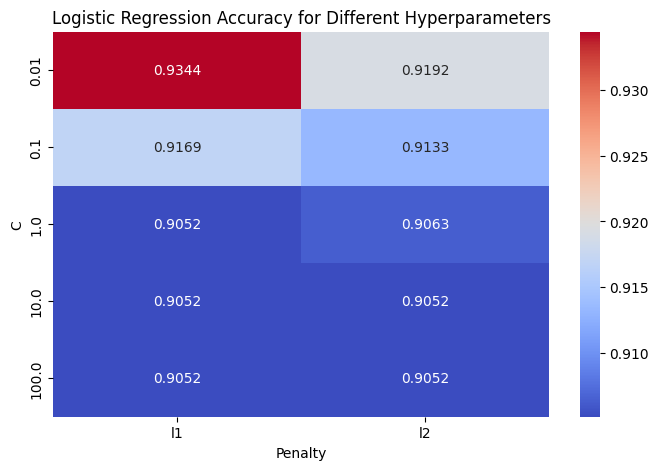

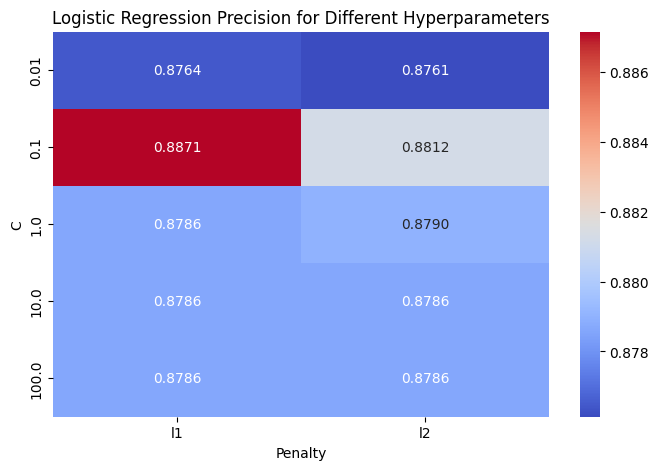

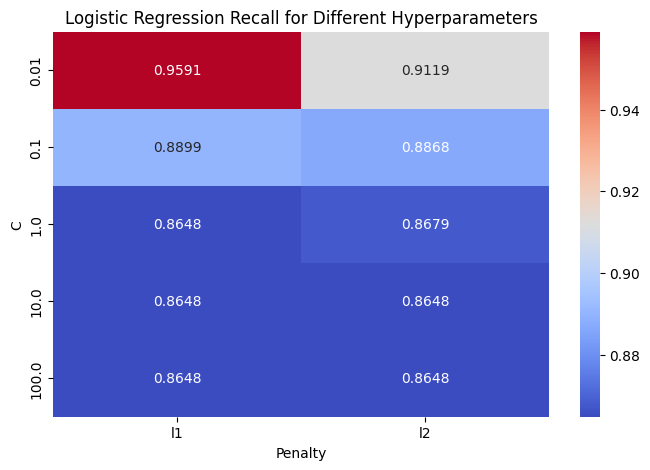

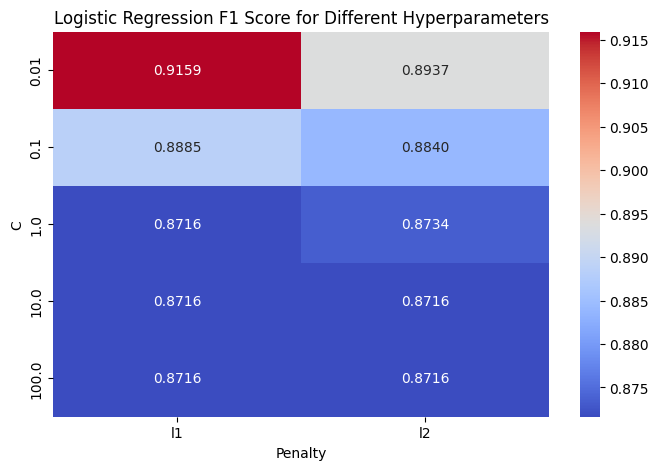

In [53]:
# Iterate through each metric to plot separate heatmaps
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for metric in metrics:
    pivot_table = results_df.pivot(index="C", columns="Penalty", values=metric)

    # Plot heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".4f")
    plt.title(f"Logistic Regression {metric} for Different Hyperparameters")
    plt.show()